In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

df = pd.read_csv('inputs/news_pol.csv')
columnas_modelos = ['sentiment_labelmdeberta', 'sentiment_labeldeberta', 'sentiment_labelroberta', 'sentiment_labelbart']
titulos_personalizados = ['mDeBERTa-v3-base-mnli-xnli', 'deberta-v3-large-zeroshot-v2.0', 'roberta-large-zeroshot-v2.0', 'bart-large-mnli']

C:\Users\cande\AppData\Local\Temp\ipykernel_31936\893529899.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, count, f"{count} ({percentages[i]:.2f}%)", ha='center', va='bottom', fontsize=10)
C:\Users\cande\AppData\Local\Temp\ipykernel_31936\893529899.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, count, f"{count} ({percentages[i]:.2f}%)", ha='center', va='bottom', fontsize=10)
C:\Users\cande\AppData\Local\Temp\ipykernel_31936\893529899.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

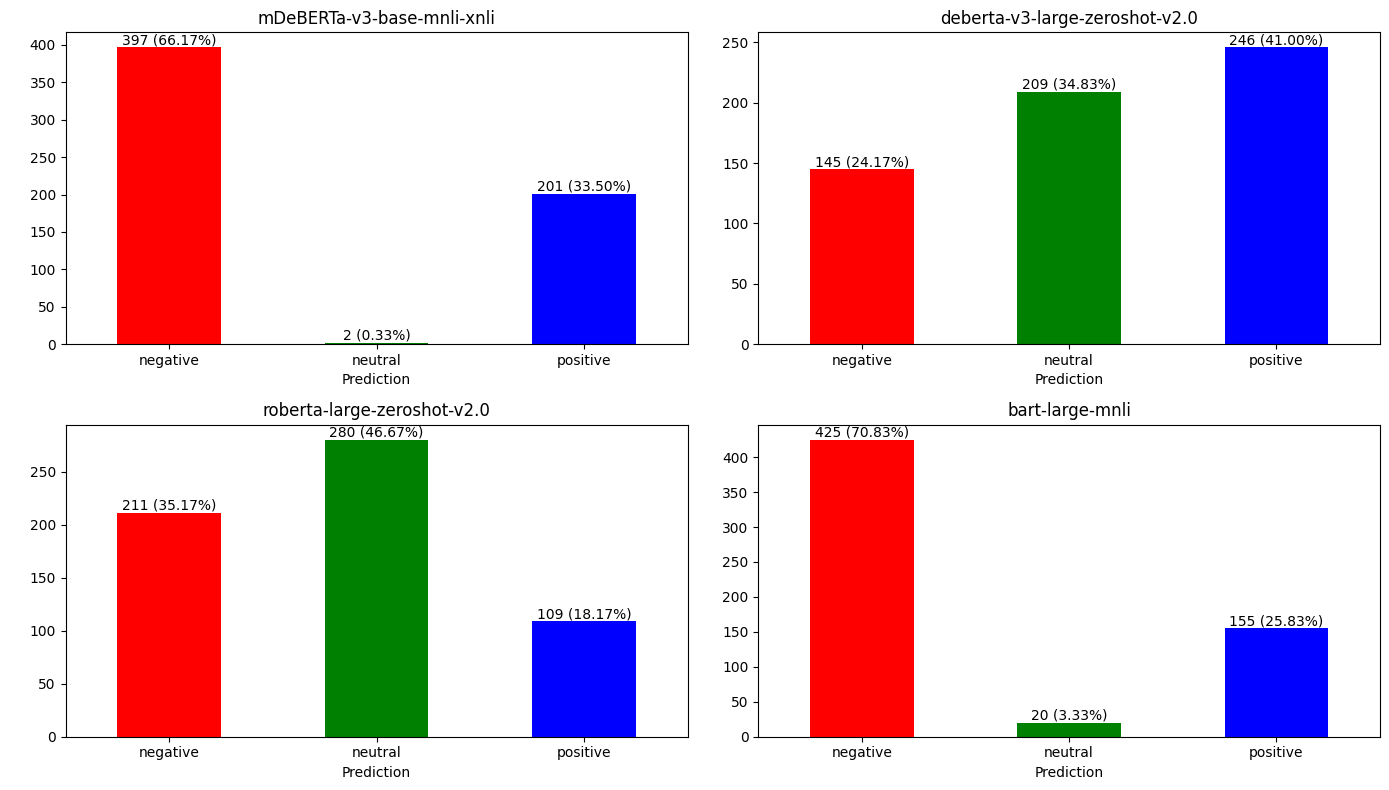

In [3]:
def plot_with_percentage(ax, counts, title):
    ordered_counts = counts.reindex(['negative', 'neutral', 'positive'])
    
    total_count = ordered_counts.sum()
    percentages = ordered_counts / total_count * 100
    
    ordered_counts.plot(kind='bar', ax=ax, color=['red', 'green', 'blue'])
    ax.set_title(title)
    ax.set_xlabel('Prediction')
    ax.set_ylabel(' ')
    ax.set_xticks(range(len(ordered_counts)))  
    ax.set_xticklabels(ordered_counts.index, rotation=0) 
    for i, count in enumerate(ordered_counts):
        ax.text(i, count, f"{count} ({percentages[i]:.2f}%)", ha='center', va='bottom', fontsize=10)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

for i, (column_model, name_model) in enumerate(zip(columnas_modelos, titulos_personalizados)):
    row = i // 2
    col = i % 2

    counts = df[column_model].value_counts()
    plot_with_percentage(axs[row, col], counts, f'{name_model}')

plt.tight_layout()
plt.show()


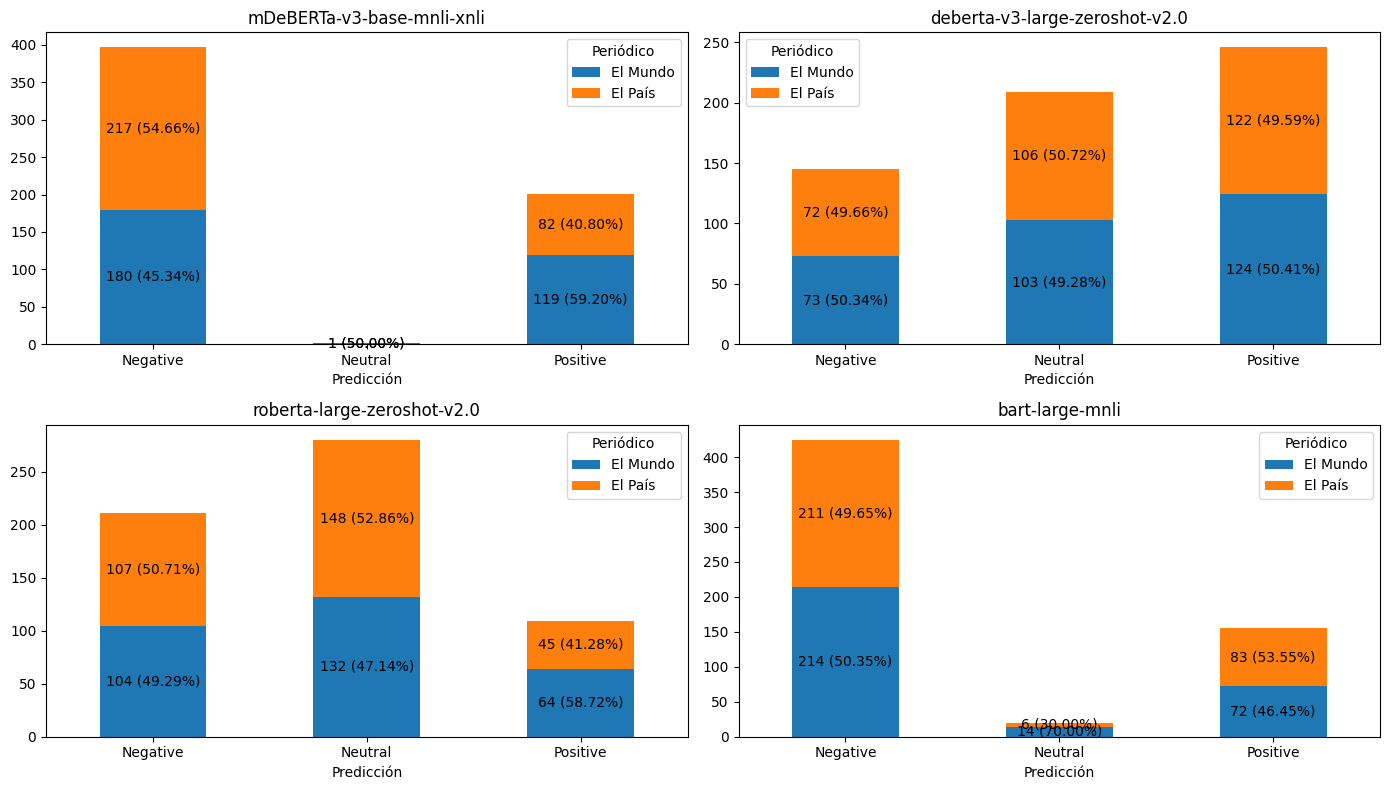

In [4]:
def plot_with_percentage2(ax, counts, title):
    total_count = counts.sum(axis=1)
    percentages = counts.div(total_count, axis=0) * 100
    counts.plot(kind='bar', stacked=True, ax=ax) 
    ax.set_title(title)
    ax.set_xlabel('Prediction')
    ax.set_ylabel(' ')
    ax.set_xticklabels(['Negative', 'Neutral', 'Positive'], rotation=0)
    for i, count in enumerate(counts.values):
        for j, value in enumerate(count):
            if value != 0:
                ax.text(i, count[:j].sum() + value / 2, f"{value} ({percentages.iloc[i, j]:.2f}%)", ha='center', va='center',color='black')

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

for i, (columna_modelo, name_modelo) in enumerate(zip(columnas_modelos, titulos_personalizados)):
    fila = i // 2
    columna = i % 2
    
    graphic = pd.crosstab(df[columna_modelo], df['periodico'])
    
    plot_with_percentage2(axs[fila, columna], graphic, name_modelo)

    axs[fila, columna].set_xlabel('Predicción')
    axs[fila, columna].set_ylabel('', fontsize=14)
    axs[fila, columna].legend(title='Periódico')

    axs[fila, columna].tick_params(axis='y', which='major')
    axs[fila, columna].tick_params(axis='x', which='major', labelrotation=0)

plt.tight_layout()
plt.show()


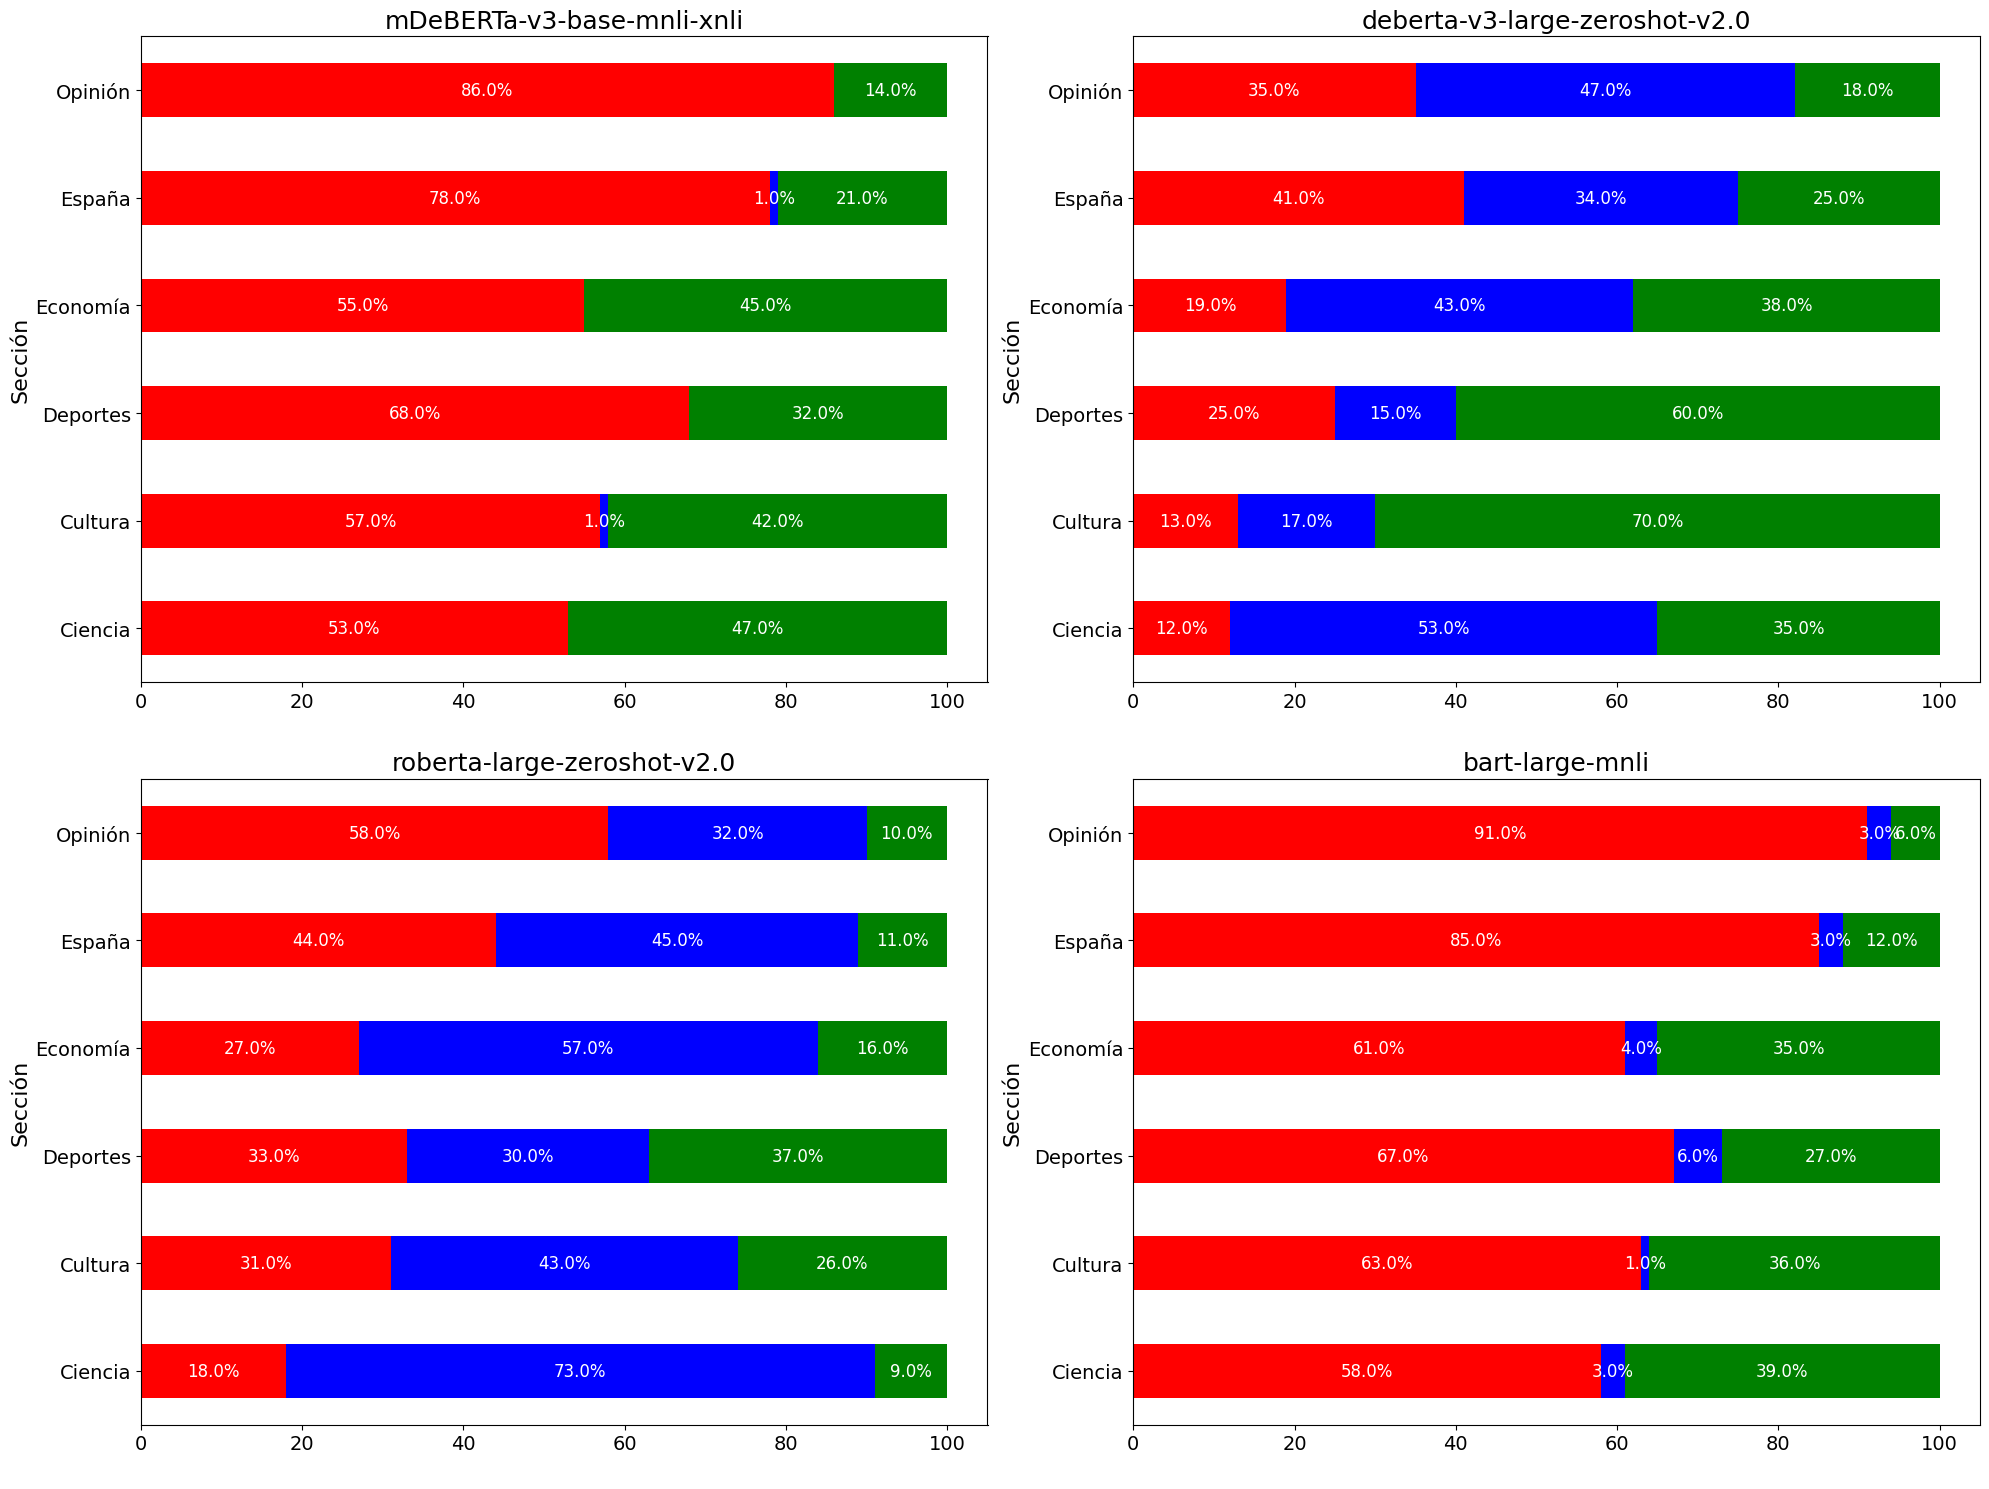

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for i, (columna_modelo, name_modelo) in enumerate(zip(columnas_modelos, titulos_personalizados)):
    fila = i // 2
    columna = i % 2
    
    graphic = pd.crosstab(df['categoria'], df[columna_modelo], normalize='index') * 100  
    graphic.plot(kind='barh', stacked=True, ax=axs[fila, columna], color=['red', 'blue', 'green'], legend=False, figsize=(20, 15))  
    
    axs[fila, columna].set_title(name_modelo, fontsize=18)
    axs[fila, columna].set_xlabel(' ', fontsize=16) 
    axs[fila, columna].set_ylabel('Sección', fontsize=16)

    axs[fila, columna].tick_params(axis='x', which='major', labelsize=14)
    axs[fila, columna].tick_params(axis='y', which='major', labelrotation=0, labelsize=14)  

    for bar in axs[fila, columna].patches:
        width = bar.get_width()
        if width != 0:
            axs[fila, columna].annotate(f'{width:.1f}%', 
                                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2),
                                        xytext=(0, 0), 
                                        textcoords='offset points', 
                                        ha='center', 
                                        va='center',
                                        fontsize=12,
                                        color='white')

plt.tight_layout()
plt.show()

# Análisis

In [6]:
df['coincidencia'] = df.apply(lambda x: (x['sentiment_labelmdeberta'] == x['sentiment_labeldeberta'] == x['sentiment_labelroberta'] == x['sentiment_labelbart']), axis=1)
coincidencias = df['coincidencia'].sum()
print(f"El número de casos en los que las 4 columnas coinciden es: {coincidencias}")
coincidencias_4_columnas = df[df['coincidencia']]
etiquetas_coincidentes = coincidencias_4_columnas[['sentiment_labelmdeberta']].stack().value_counts()
print("Etiquetas cuando las 4 columnas coinciden:")
print(etiquetas_coincidentes)

El número de casos en los que las 4 columnas coinciden es: 144
Etiquetas cuando las 4 columnas coinciden:
negative    103
positive     41
Name: count, dtype: int64


In [7]:
coincidencias_3_columnas = df[(df['sentiment_labelmdeberta'] == df['sentiment_labeldeberta']) & 
                               (df['sentiment_labelmdeberta'] == df['sentiment_labelroberta']) |
                               (df['sentiment_labelmdeberta'] == df['sentiment_labeldeberta']) &
                               (df['sentiment_labelmdeberta'] == df['sentiment_labelbart']) |
                               (df['sentiment_labelmdeberta'] == df['sentiment_labelroberta']) &
                               (df['sentiment_labelmdeberta'] == df['sentiment_labelbart']) |
                               (df['sentiment_labeldeberta'] == df['sentiment_labelroberta']) &
                               (df['sentiment_labeldeberta'] == df['sentiment_labelbart'])]

print("Coincidencias en 3 columnas:", coincidencias_3_columnas.shape[0])
print("Coincidencias solo en 3 columnas:", coincidencias_3_columnas.shape[0]- coincidencias_4_columnas.shape[0])


Coincidencias en 3 columnas: 330
Coincidencias solo en 3 columnas: 186


In [8]:
titulos_personalizados = ['mDeBERTa-v3-base-mnli-xnli', 'deberta-v3-large-zeroshot-v2.0', 'roberta-large-zeroshot-v2.0', 'bart-large-mnli']

coincidencias_3_columnas = coincidencias_3_columnas.copy()

def encontrar_columnas_coincidentes(fila):
    coincidencias = []
    columnas = ['sentiment_labelmdeberta', 'sentiment_labeldeberta', 'sentiment_labelroberta', 'sentiment_labelbart']
    for i in range(len(columnas)):
        for j in range(i+1, len(columnas)):
            for k in range(j+1, len(columnas)):
                if fila[columnas[i]] == fila[columnas[j]] == fila[columnas[k]]:
                    coincidencias.append((titulos_personalizados[i], titulos_personalizados[j], titulos_personalizados[k]))
    return coincidencias

coincidencias_por_fila = coincidencias_3_columnas.apply(encontrar_columnas_coincidentes, axis=1)

coincidencias_3_columnas['coincidencias'] = coincidencias_por_fila

conteo_coincidencias = coincidencias_3_columnas['coincidencias'].value_counts()
tabla_conteo = conteo_coincidencias.reset_index()
tabla_conteo.columns = ['Combinación', 'Cantidad']
display(tabla_conteo)


,Combinación,Cantidad
0,"[(mDeBERTa-v3-base-mnli-xnli, deberta-v3-large-zeroshot-v2.0, roberta-large-zeroshot-v2.0), (mDeBERTa-v3-base-mnli-xnli, deberta-v3-large-zeroshot-v2.0, bart-large-mnli), (mDeBERTa-v3-base-mnli-xnli, roberta-large-zeroshot-v2.0, bart-large-mnli), (deberta-v3-large-zeroshot-v2.0, roberta-large-zeroshot-v2.0, bart-large-mnli)]",144
1,"[(mDeBERTa-v3-base-mnli-xnli, roberta-large-zeroshot-v2.0, bart-large-mnli)]",79
2,"[(mDeBERTa-v3-base-mnli-xnli, deberta-v3-large-zeroshot-v2.0, bart-large-mnli)]",65
3,"[(mDeBERTa-v3-base-mnli-xnli, deberta-v3-large-zeroshot-v2.0, roberta-large-zeroshot-v2.0)]",26
4,"[(deberta-v3-large-zeroshot-v2.0, roberta-large-zeroshot-v2.0, bart-large-mnli)]",16


In [9]:
coincidencias_3_columnas = coincidencias_3_columnas.copy()
def encontrar_columnas_coincidentes(fila):
    coincidencias = []
    columnas = ['sentiment_labelmdeberta', 'sentiment_labeldeberta', 'sentiment_labelroberta', 'sentiment_labelbart']
    for i in range(len(columnas)):
        for j in range(i+1, len(columnas)):
            for k in range(j+1, len(columnas)):
                if fila[columnas[i]] == fila[columnas[j]] == fila[columnas[k]]:
                    coincidencias.append((columnas[i], columnas[j], columnas[k]))
    return coincidencias

coincidencias_3_columnas.loc[:, 'coincidencias'] = coincidencias_3_columnas.apply(encontrar_columnas_coincidentes, axis=1)

conteo_coincidencias = coincidencias_3_columnas['coincidencias'].value_counts()
tabla_conteo = conteo_coincidencias.reset_index()
tabla_conteo.columns = ['Combinación', 'Cantidad']
display(tabla_conteo)

,Combinación,Cantidad
0,"[(sentiment_labelmdeberta, sentiment_labeldeberta, sentiment_labelroberta), (sentiment_labelmdeberta, sentiment_labeldeberta, sentiment_labelbart), (sentiment_labelmdeberta, sentiment_labelroberta, sentiment_labelbart), (sentiment_labeldeberta, sentiment_labelroberta, sentiment_labelbart)]",144
1,"[(sentiment_labelmdeberta, sentiment_labelroberta, sentiment_labelbart)]",79
2,"[(sentiment_labelmdeberta, sentiment_labeldeberta, sentiment_labelbart)]",65
3,"[(sentiment_labelmdeberta, sentiment_labeldeberta, sentiment_labelroberta)]",26
4,"[(sentiment_labeldeberta, sentiment_labelroberta, sentiment_labelbart)]",16


In [10]:

coincidencias_2_columnas = df[(df['sentiment_labelmdeberta'] == df['sentiment_labeldeberta']) |
                               (df['sentiment_labelmdeberta'] == df['sentiment_labelroberta']) |
                               (df['sentiment_labelmdeberta'] == df['sentiment_labelbart']) |
                               (df['sentiment_labeldeberta'] == df['sentiment_labelroberta']) |
                               (df['sentiment_labeldeberta'] == df['sentiment_labelbart']) |
                               (df['sentiment_labelroberta'] == df['sentiment_labelbart'])]

print("Coincidencias en 2 columnas:", coincidencias_2_columnas.shape[0])


Coincidencias en 2 columnas: 600


In [11]:
for columna in columnas_modelos:
    print(f"Columna: {columna}")
    
    percentage_by_class = df.groupby(['categoria', columna]).size() / df.groupby('categoria').size()

    for clase in ['negative', 'positive', 'neutral']:
        percentage = percentage_by_class[:, clase].sort_values(ascending=False)
        print(f"Secciones ordenadas por porcentaje de '{clase}':")
        print(percentage)
        print()

Columna: sentiment_labelmdeberta
Secciones ordenadas por porcentaje de 'negative':
categoria
Opinión     0.86
España      0.78
Deportes    0.68
Cultura     0.57
Economía    0.55
Ciencia     0.53
dtype: float64

Secciones ordenadas por porcentaje de 'positive':
categoria
Ciencia     0.47
Economía    0.45
Cultura     0.42
Deportes    0.32
España      0.21
Opinión     0.14
dtype: float64

Secciones ordenadas por porcentaje de 'neutral':
categoria
Cultura    0.01
España     0.01
dtype: float64

Columna: sentiment_labeldeberta
Secciones ordenadas por porcentaje de 'negative':
categoria
España      0.41
Opinión     0.35
Deportes    0.25
Economía    0.19
Cultura     0.13
Ciencia     0.12
dtype: float64

Secciones ordenadas por porcentaje de 'positive':
categoria
Cultura     0.70
Deportes    0.60
Economía    0.38
Ciencia     0.35
España      0.25
Opinión     0.18
dtype: float64

Secciones ordenadas por porcentaje de 'neutral':
categoria
Ciencia     0.53
Opinión     0.47
Economía    0.43
España